In [1]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

print(colored('\nAll libraries imported succesfully.', 'blue'))


All libraries imported succesfully.


In [3]:
df = pd.read_csv('data/Cardiovascular_Disease_Dataset.csv')
df.head(10)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
9,192523,61,0,0,190,181,0,1,150,0,2.9,2,0,1


In [4]:
nRow, nCol = df.shape
print("Shape of dataset {}".format(df.shape))
print(f"Rows: {nRow} \nColumns: {nCol}")

Shape of dataset (1000, 14)
Rows: 1000 
Columns: 14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [6]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [76]:
print("Số lượng dữ liệu thiếu trong mỗi cột:")
df.isna().sum()

Số lượng dữ liệu thiếu trong mỗi cột:


patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [8]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [78]:
# Thống kê mô tả
description = df.describe()
print("Thống kê mô tả của các cột số học:\n", description)

Thống kê mô tả của các cột số học:
           patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.770123     34.190

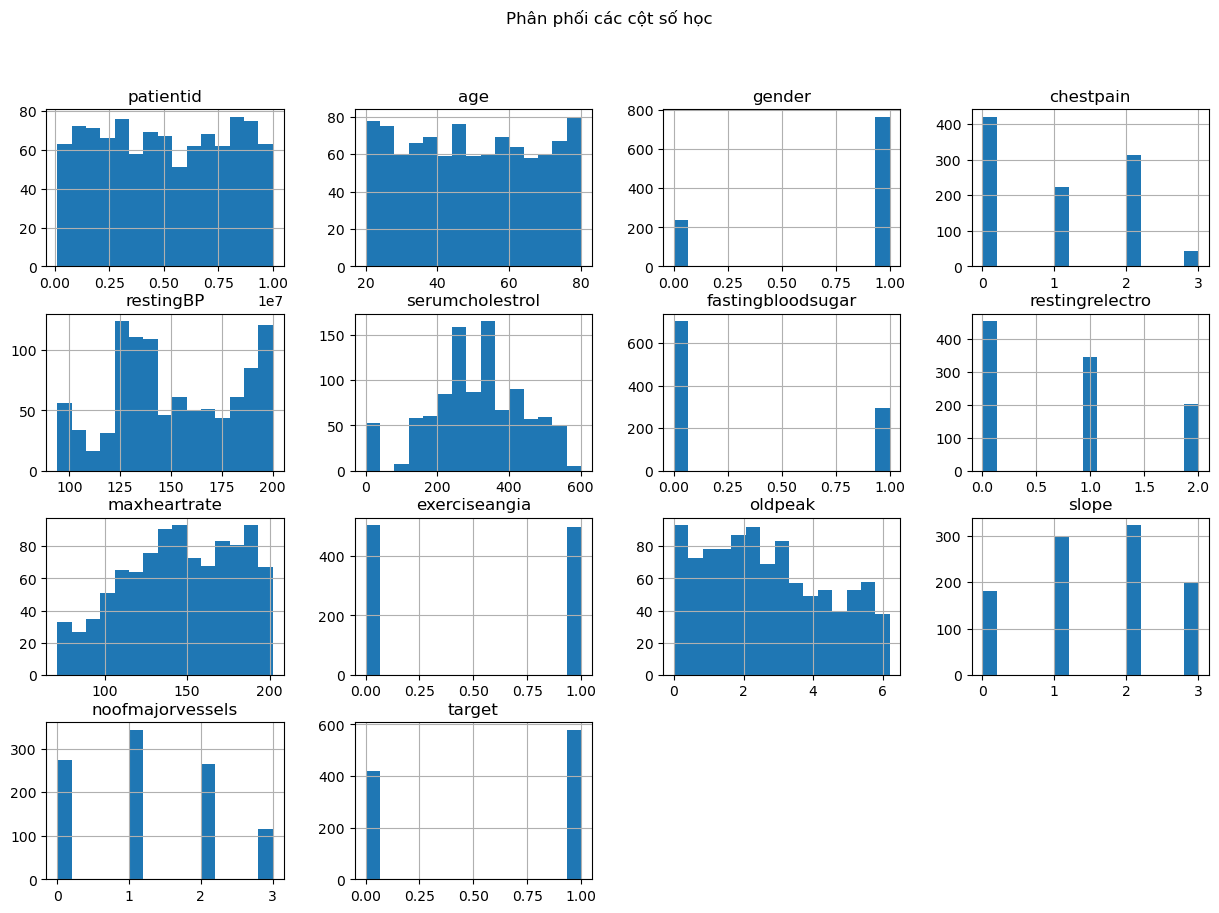

In [105]:
# Vẽ histogram cho các cột số học
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Phân phối các cột số học')
plt.savefig('phanphoicotsohoc.png')  # Lưu ảnh dưới định dạng PNG
plt.show()

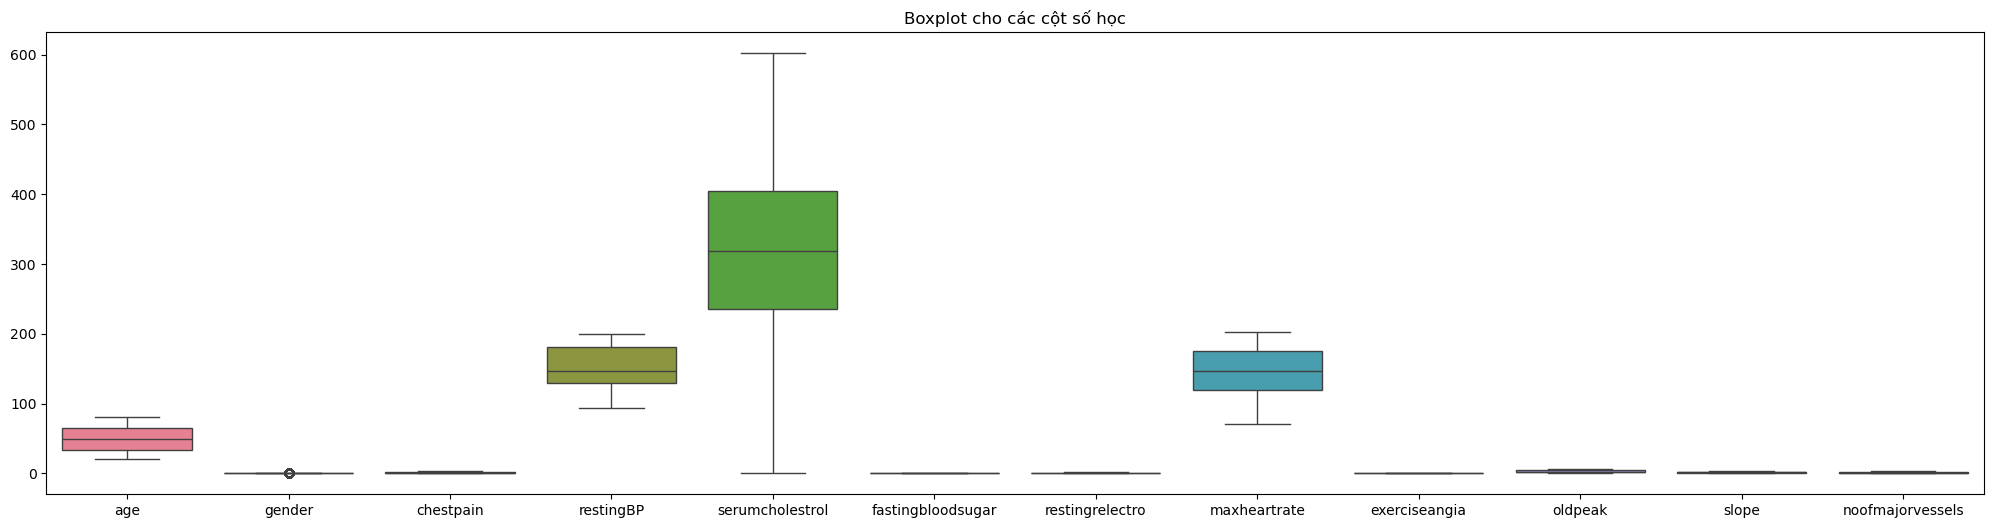

In [107]:
# Vẽ boxplot cho các cột số học
plt.figure(figsize=(25, 6))
sns.boxplot(data=df.drop(columns=['patientid', 'target']))
plt.title('Boxplot cho các cột số học')
plt.savefig('Boxplotchocotsohoc.png')  # Lưu ảnh dưới định dạng PNG
plt.show()

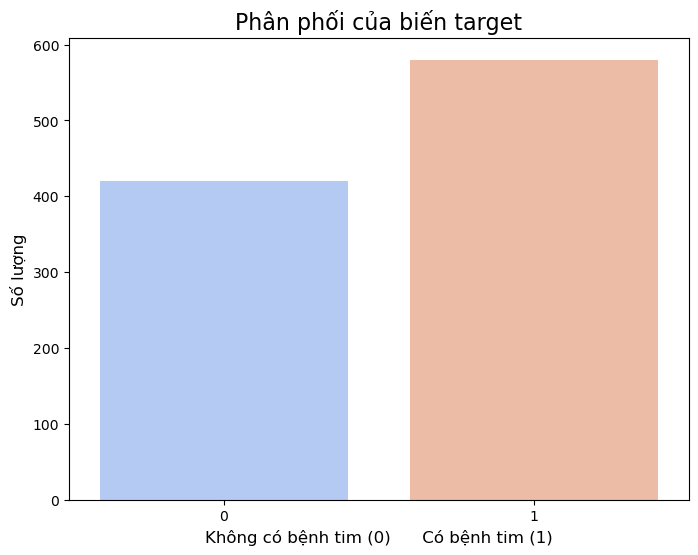

In [111]:
# Hiển thị biểu đồ countplot
plt.figure(figsize=(8, 6))  # Điều chỉnh kích thước biểu đồ
sns.countplot(x=df['target'], palette='coolwarm')  # Xác định trục x
plt.title('Phân phối của biến target', fontsize=16)
plt.xlabel('Không có bệnh tim (0)      Có bệnh tim (1)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.savefig('phanphoibientarget.png')  # Lưu ảnh dưới định dạng PNG
plt.show()

In [139]:
from scipy.stats import shapiro
# Lọc các cột số học trong dataset
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Kiểm tra phân phối chuẩn cho mỗi cột số học
for column in numerical_cols:
    stat, p = shapiro(df[column].dropna())  # Loại bỏ giá trị thiếu
    print(f"Shapiro-Wilk Test for {column}: stat=%.3f, p=%.3f" % (stat, p))
    if p > 0.05:
        print(f'{column} có phân phối chuẩn')
    else:
        print(f'{column} không có phân phối chuẩn')
    print('-' * 50)

Shapiro-Wilk Test for patientid: stat=0.948, p=0.000
patientid không có phân phối chuẩn
--------------------------------------------------
Shapiro-Wilk Test for age: stat=0.951, p=0.000
age không có phân phối chuẩn
--------------------------------------------------
Shapiro-Wilk Test for gender: stat=0.525, p=0.000
gender không có phân phối chuẩn
--------------------------------------------------
Shapiro-Wilk Test for chestpain: stat=0.808, p=0.000
chestpain không có phân phối chuẩn
--------------------------------------------------
Shapiro-Wilk Test for restingBP: stat=0.948, p=0.000
restingBP không có phân phối chuẩn
--------------------------------------------------
Shapiro-Wilk Test for serumcholestrol: stat=0.978, p=0.000
serumcholestrol không có phân phối chuẩn
--------------------------------------------------
Shapiro-Wilk Test for fastingbloodsugar: stat=0.573, p=0.000
fastingbloodsugar không có phân phối chuẩn
--------------------------------------------------
Shapiro-Wilk Test

In [137]:
from scipy.stats import shapiro

stat, p = shapiro(df)
print('Shapiro-Wilk Test: stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Dữ liệu có phân phối chuẩn')
else:
    print('Dữ liệu không có phân phối chuẩn')

Shapiro-Wilk Test: stat=0.254, p=0.000
Dữ liệu không có phân phối chuẩn


In [123]:
import pandas as pd
# Lọc bỏ cột không phải số học
columns_to_check = df.drop(columns=['patientid', 'target', 'gender']).columns
# Kiểm tra outliers bằng phương pháp IQR vì dữ liệu không có phân phối chuẩn
outliers = {}
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Kiểm tra các giá trị outlier
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
# In ra số lượng outliers cho từng cột
for column, count in outliers.items():
    print(f"Outliers trong cột {column}: {count} mẫu")

Outliers trong cột age: 0 mẫu
Outliers trong cột gender: 235 mẫu
Outliers trong cột chestpain: 0 mẫu
Outliers trong cột restingBP: 0 mẫu
Outliers trong cột serumcholestrol: 0 mẫu
Outliers trong cột fastingbloodsugar: 0 mẫu
Outliers trong cột restingrelectro: 0 mẫu
Outliers trong cột maxheartrate: 0 mẫu
Outliers trong cột exerciseangia: 0 mẫu
Outliers trong cột oldpeak: 0 mẫu
Outliers trong cột slope: 0 mẫu
Outliers trong cột noofmajorvessels: 0 mẫu


In [9]:
age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
print(age_range)

Age Range: 20 - 80


In [10]:
gender_count = df['gender'].value_counts() ## (0: Female; 1: Male)
print(gender_count)

gender
1    765
0    235
Name: count, dtype: int64


In [11]:
chest_pain_counts = df['chestpain'].value_counts()
print(chest_pain_counts)

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


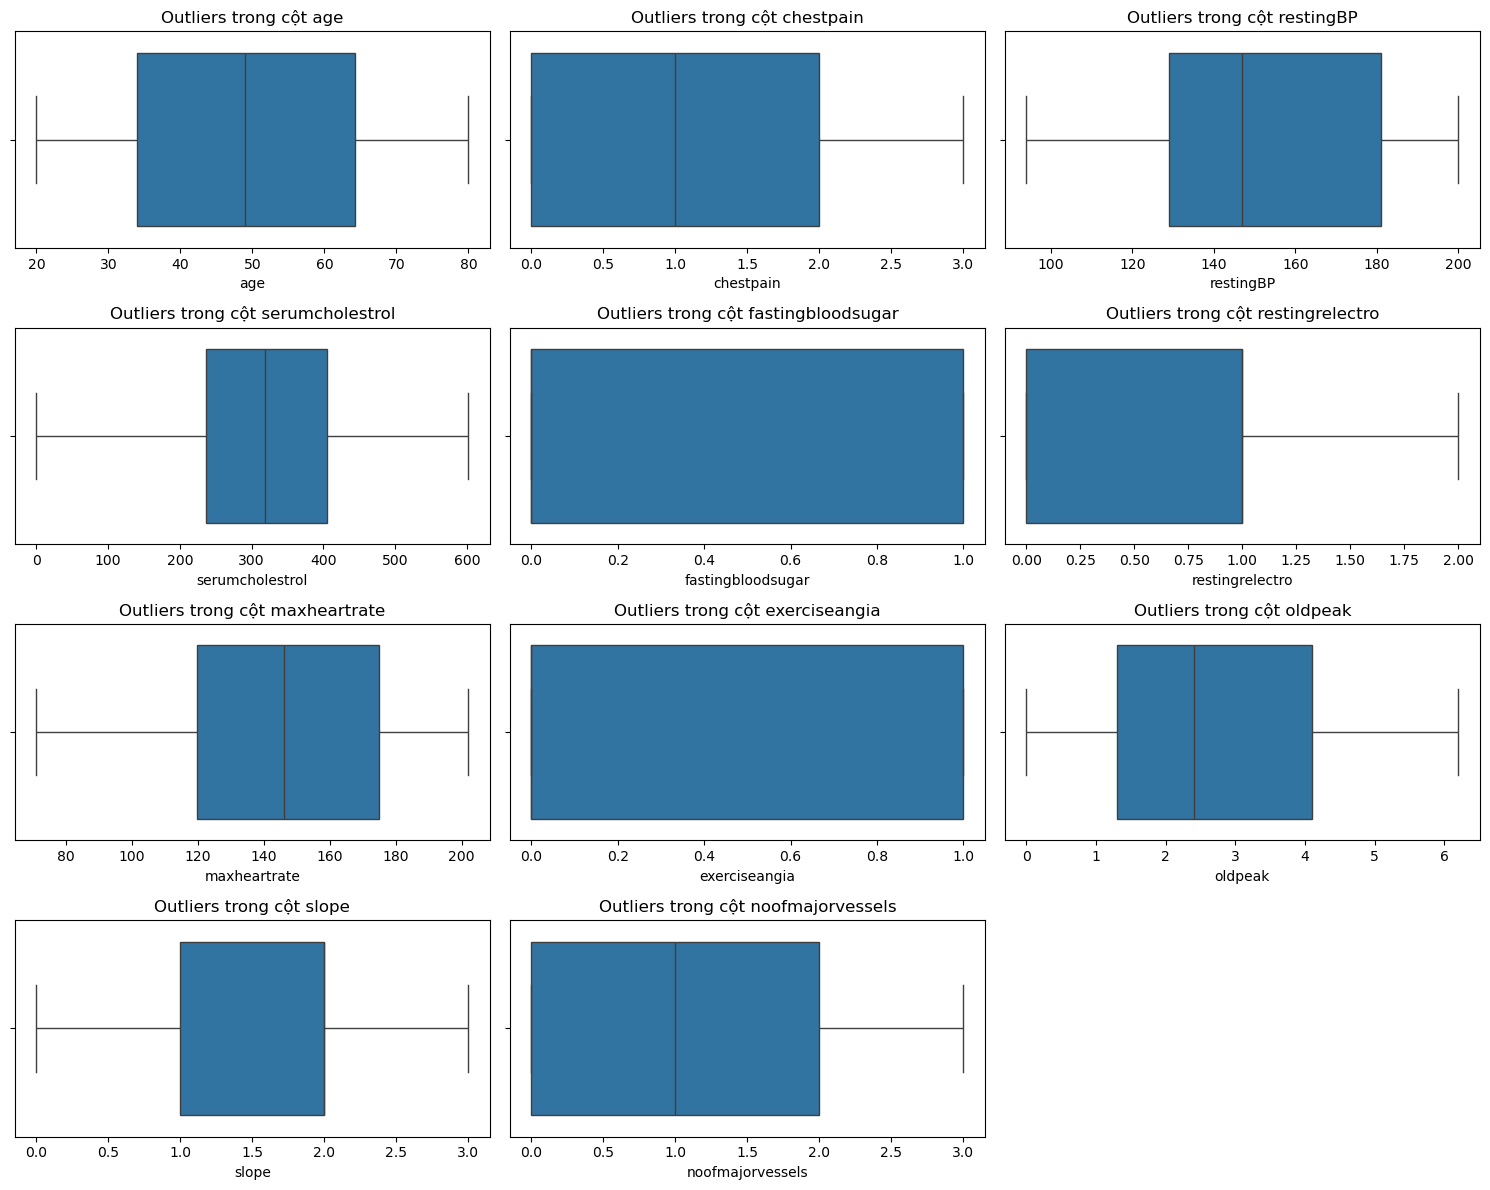

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc bỏ cột 'patientid' và 'target' nếu không phải cột số học
columns_to_check = df.drop(columns=['patientid', 'target', 'gender']).columns

# Vẽ boxplot cho từng cột
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 3, i)  # 4 dòng và 3 cột
    sns.boxplot(x=df[column])
    plt.title(f'Outliers trong cột {column}')
    plt.xlabel(column)

plt.tight_layout()  # Đảm bảo các biểu đồ không chồng chéo lên nhau
plt.savefig('kiemtraOutlierMoicot.png')  # Lưu ảnh dưới định dạng PNG
plt.show()


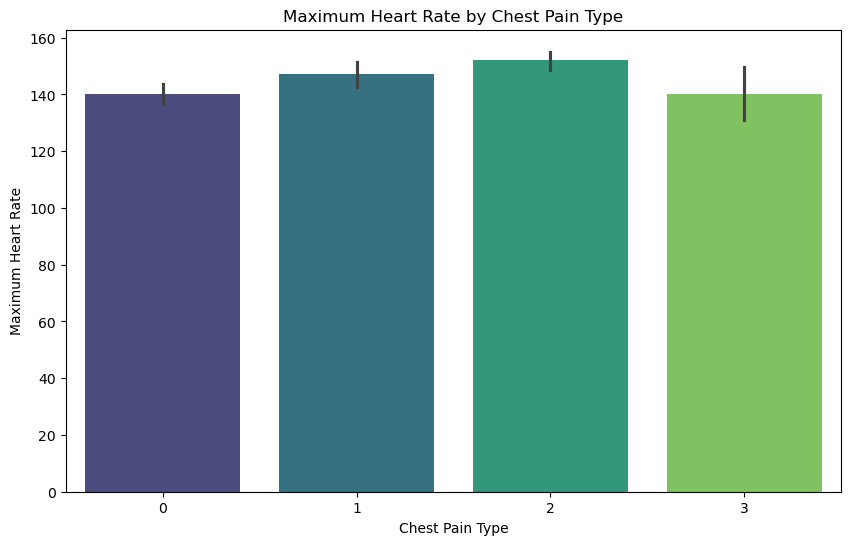

In [13]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [14]:
average_resting_bp = df['restingBP'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")

Average Resting Blood Pressure: 151.75 mm Hg


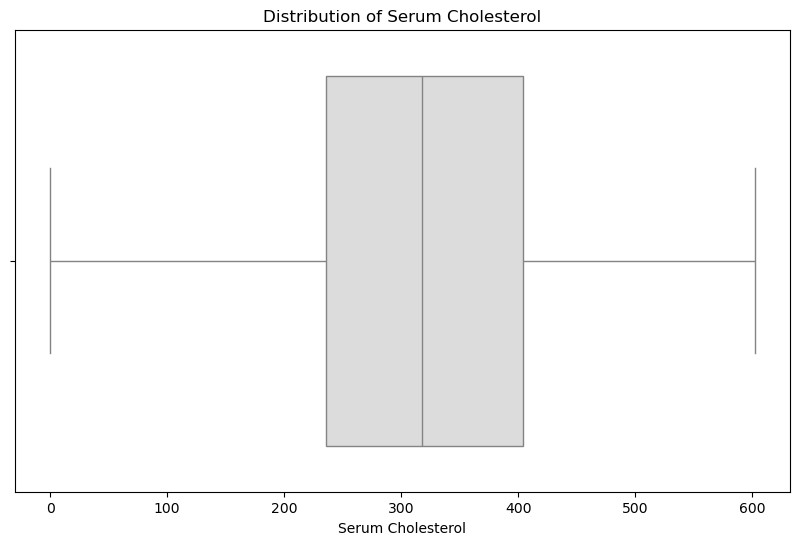

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='serumcholestrol', data=df, palette='coolwarm')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.show()

In [16]:
percentage_high_fasting_sugar = (df['fastingbloodsugar'].sum() / len(df)) * 100
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar:.2f}%")

Percentage of patients with fasting blood sugar > 120 mg/dl: 29.60%


In [17]:
resting_electro_counts = df['restingrelectro'].value_counts()
print(resting_electro_counts)

restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64


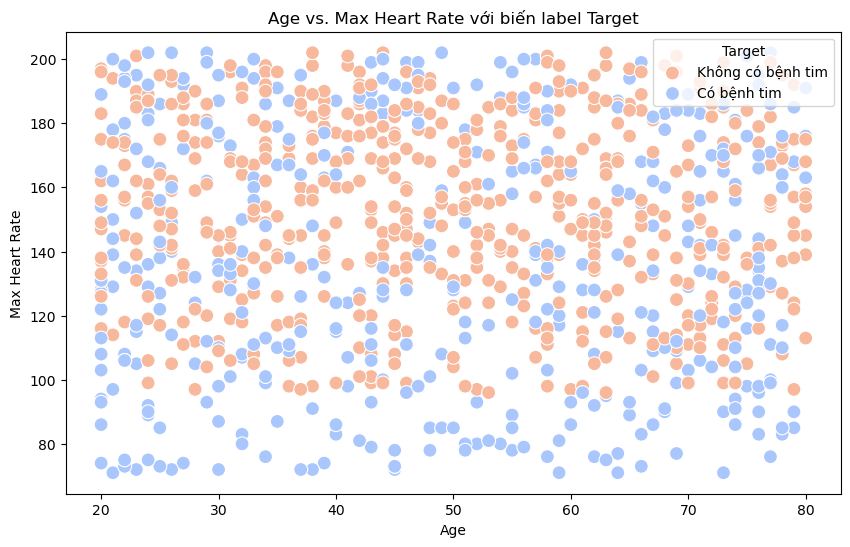

In [46]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='maxheartrate', hue='target', data=df, palette='coolwarm', s=100)
plt.title('Age vs. Max Heart Rate với biến label Target')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Target', loc='upper right', labels=['Không có bệnh tim', 'Có bệnh tim'])
plt.show()

In [19]:
average_max_heart_rate = df['maxheartrate'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")

Average Maximum Heart Rate: 145.48


In [20]:
exercise_angina_count = df['exerciseangia'].sum()
print(f"Number of Patients with Exercise-Induced Angina: {exercise_angina_count}")

Number of Patients with Exercise-Induced Angina: 498


In [21]:
average_oldpeak = df['oldpeak'].mean()
print(f"Average Oldpeak: {average_oldpeak:.2f}")

Average Oldpeak: 2.71


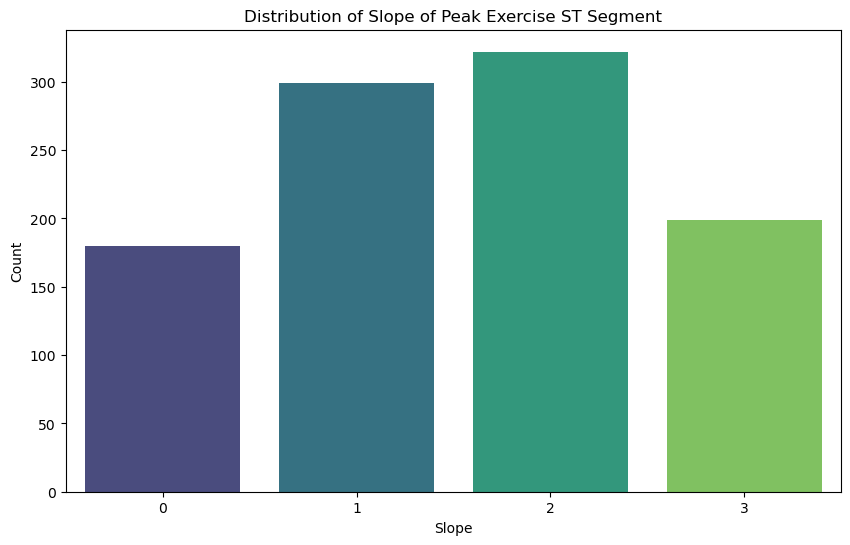

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

### Phân tích các biến:
### Phân phối của biến mục tiêu (target)

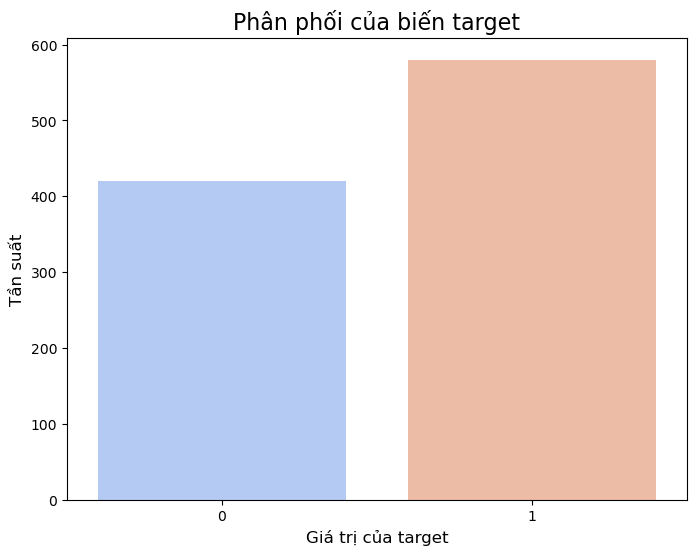

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


# Hiển thị biểu đồ countplot
plt.figure(figsize=(8, 6))  # Điều chỉnh kích thước biểu đồ
sns.countplot(x=df['target'], palette='coolwarm')  # Xác định trục x
plt.title('Phân phối của biến target', fontsize=16)
plt.xlabel('Giá trị của target', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.show()


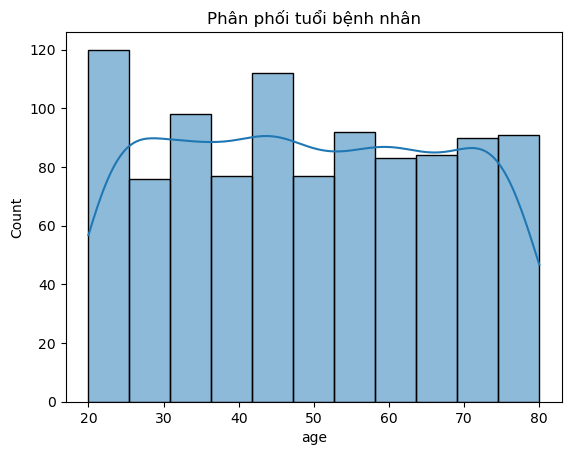

In [25]:
sns.histplot(df['age'], kde=True)
plt.title('Phân phối tuổi bệnh nhân')
plt.show()

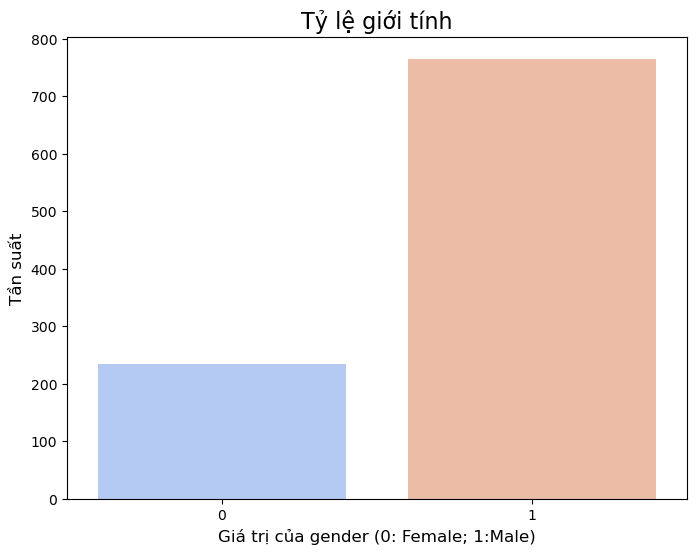

In [26]:
# Hiển thị biểu đồ countplot
plt.figure(figsize=(8, 6))  # Điều chỉnh kích thước biểu đồ
sns.countplot(x=df['gender'], palette='coolwarm')  # Xác định trục x
plt.title('Tỷ lệ giới tính', fontsize=16)
plt.xlabel('Giá trị của gender (0: Female; 1:Male)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.show()

###  Phân tích mối quan hệ giữa các biến:
### Tương quan giữa các biến số

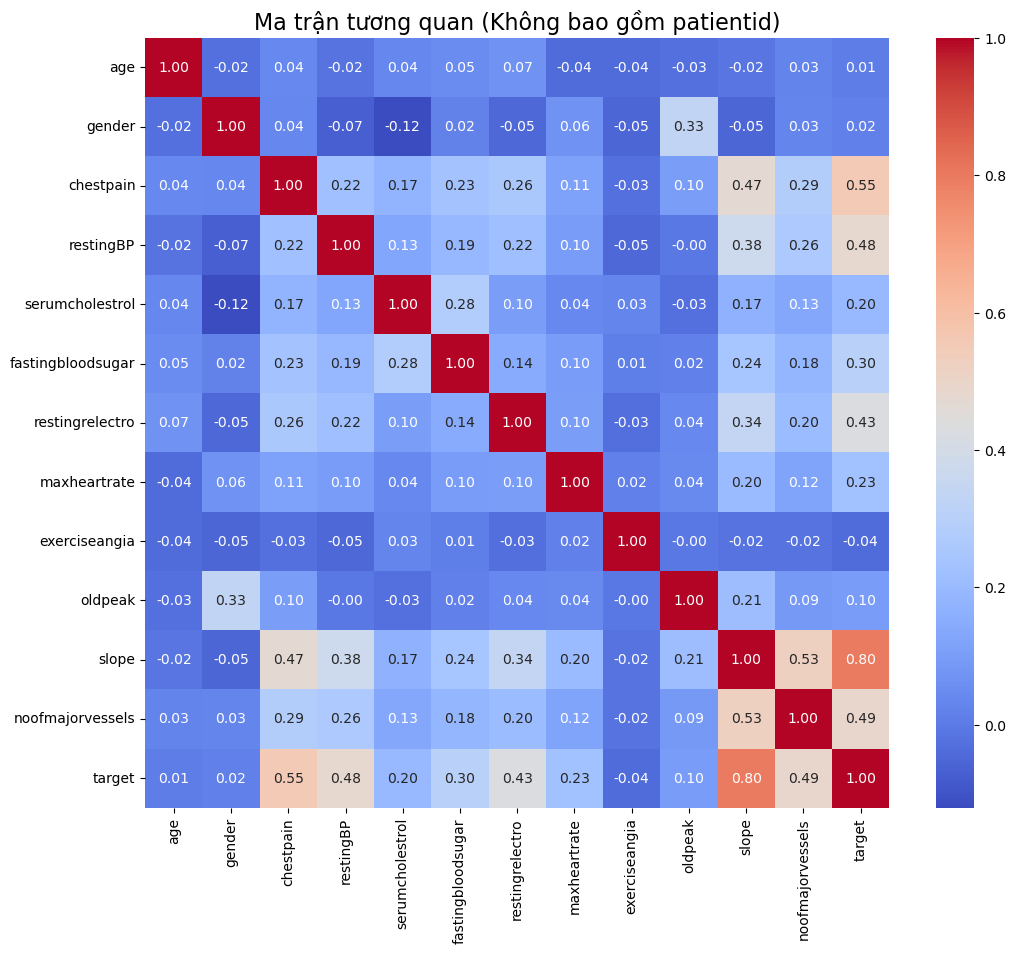

In [109]:
# Tính toán ma trận tương quan
corr = df.corr()

# Loại bỏ hàng và cột của 'patientid'
corr_without_patientid = corr.drop('patientid', axis=0).drop('patientid', axis=1)

# Điều chỉnh kích thước biểu đồ
plt.figure(figsize=(12, 10))  # Tăng kích thước width=12, height=10
sns.heatmap(corr_without_patientid, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Ma trận tương quan (Không bao gồm patientid)', fontsize=16)
plt.savefig('matrantuongquan.png')  # Lưu dưới dạng PNG
plt.show()

### Biến số vs biến mục tiêu:

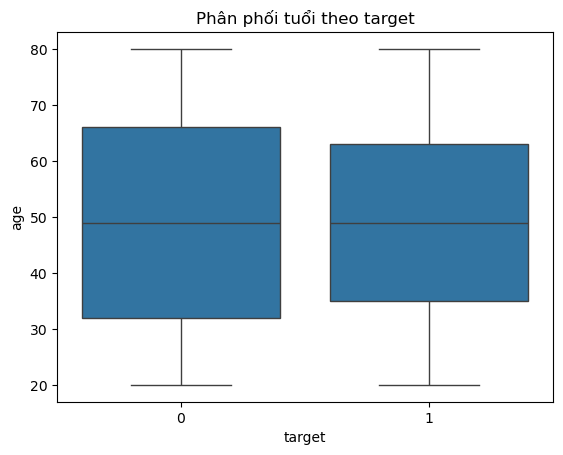

In [30]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Phân phối tuổi theo target')
plt.show()

### Phân tích đa biến:

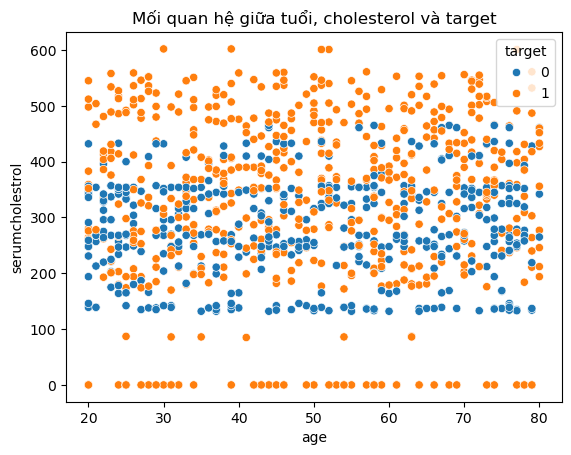

In [32]:
sns.scatterplot(x='age', y='serumcholestrol', hue='target', data=df)
plt.title('Mối quan hệ giữa tuổi, cholesterol và target')
plt.show()

### Xử lý giá trị ngoại lai
### Xác định ngoại lai với biểu đồ:

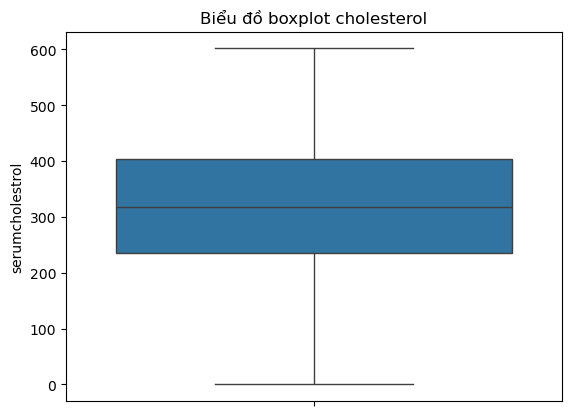

In [34]:
sns.boxplot(df['serumcholestrol'])
plt.title('Biểu đồ boxplot cholesterol')
plt.show()


target               1.000000
slope                0.797358
chestpain            0.554228
noofmajorvessels     0.489866
restingBP            0.482387
restingrelectro      0.426837
fastingbloodsugar    0.303233
maxheartrate         0.228343
serumcholestrol      0.195340
oldpeak              0.098053
gender               0.015769
age                  0.008356
patientid           -0.005637
exerciseangia       -0.039874
Name: target, dtype: float64


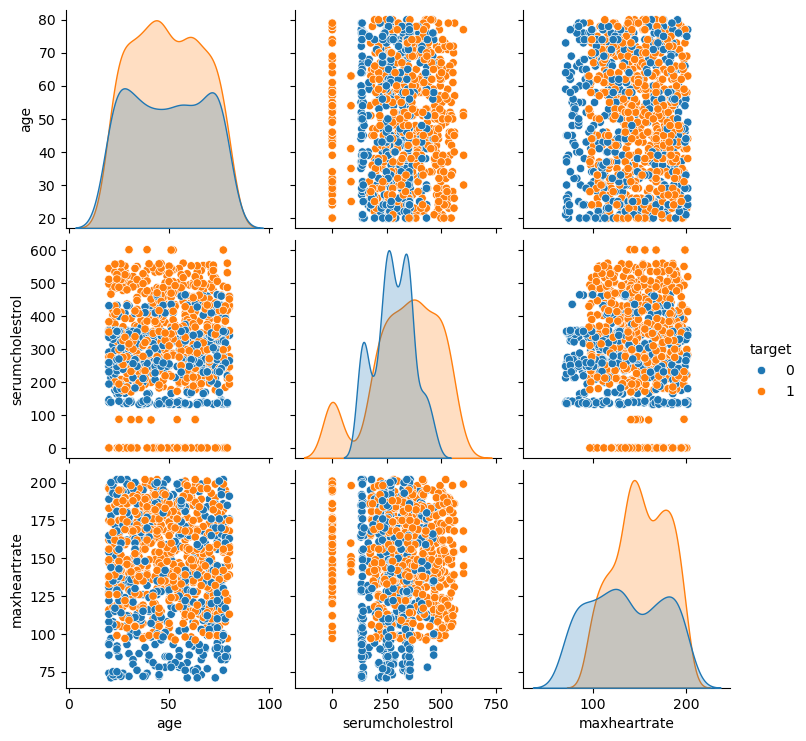

In [115]:
corr_target = corr['target'].sort_values(ascending=False)
print(corr_target)
sns.pairplot(df, vars=['age', 'serumcholestrol', 'maxheartrate'], hue='target')
plt.show()